In [1]:
import pandas as pd

In [2]:
# 카카오톡 데이터를 불러와서 내용을 확인합니다.
data3 = pd.read_csv("data/단톡방03.csv")
print(data3.head())
print(data3.info())

               Date User                                      Message
0  2017/01/01 20:32   무지  https://www.youtube.com/watch?v=Y9J-ohYyP9o
1  2017/01/01 20:32   무지                           이거보면 왜 갓창정인지 알게된다 
2  2017/01/01 21:40  어피치                                          창정헌
3  2017/01/01 22:19  어피치                            라이언은 내일부터 연구실 출근?
4  2017/01/01 22:20   무지                                   파티 하는거 아님?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195490 entries, 0 to 195489
Data columns (total 3 columns):
Date       195490 non-null object
User       195490 non-null object
Message    195490 non-null object
dtypes: object(3)
memory usage: 4.5+ MB
None


In [3]:
# 메세지만 따로 불러옵니다.
corpus = data3['Message']
corpus

0         https://www.youtube.com/watch?v=Y9J-ohYyP9o
1                                  이거보면 왜 갓창정인지 알게된다 
2                                                 창정헌
3                                   라이언은 내일부터 연구실 출근?
4                                          파티 하는거 아님?
5                                                 헬파티
6                                                헬파이어
7                                               파이어에그
8                                                리마리오
9                                                프로도?
10                                                 예스
11                                           Emoticon
12                                                호우 
13                                               팟팟헌?
14                                              리마리오헌
15                                               느끼헌?
16                                               안그래도
17                                               오늘힘듬
18                          

In [4]:
# 데이터 전처리를 위한 전체 데이터의 특징을 빈도분석으로 파악해봅니다.

import nltk

total_tokens = [token for msg in corpus for token in str(msg).split()]
print(len(total_tokens))

345465


In [5]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
print(text.vocab().most_common(10))

125511
[('ㅇㅇ', 7505), ('굿', 3352), ('Emoticon', 2753), ('ㄱㄱ', 2542), ('아', 2332), ('ㄴㄴ', 2159), ('핳', 2075), ('ㅇㅋ', 1789), ('Photo', 1703), ('난', 1577)]


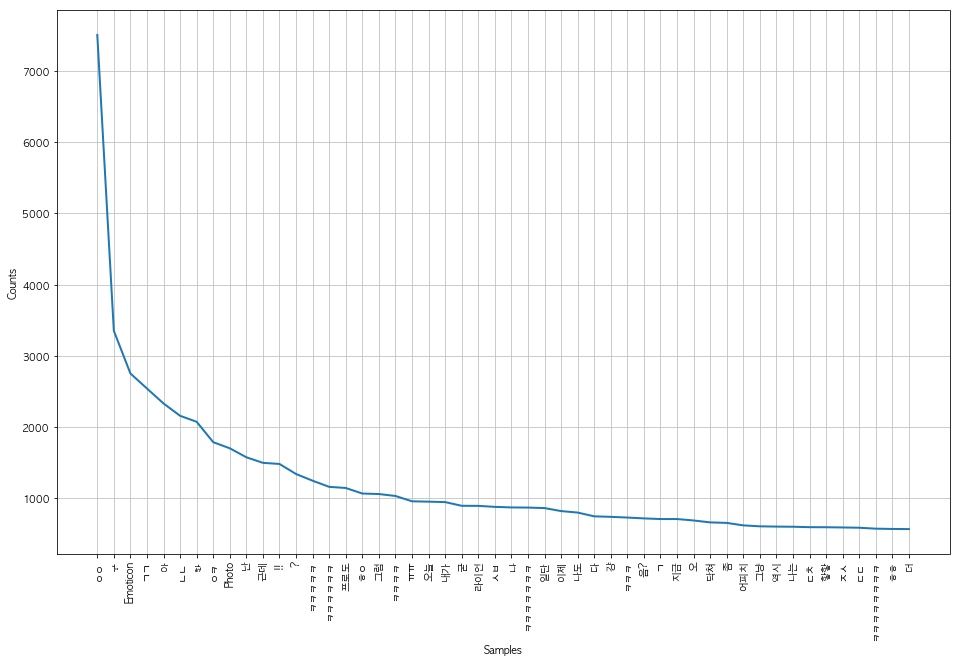

In [6]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

In [7]:
import re

def message_cleaning(docs):

    """
        1. Photo, Emoticon은 그 내용을 알 수 없으므로 제거.
        
        2. 자음/모음 표현 처리방법.
        
            1) "ㅇㅇ" ,"ㅋㅋㅋㅋㅋ" 같은 자음만 존재하는 표현이나, "ㅡㅡ", "ㅠㅠ" 같은 모음만 존재하는 표현들은
            의미는 있으나 중요한 의미를 가지고 있지 않다고 판단하여 제거.
            
            2) 이러한 표현들도 전부 emoticon 같은 감정 표현의 의성어로 쓰거나, 단축 표현이므로 제거하지 않음. 
            
        3. http:// 로 시작하는 hyperlink 제거.
        
        4. 특수문자 제거.
    
    """
    # Series의 object를 str로 변경.
    docs = [str(doc) for doc in docs]
    
    # 1
    pattern1 = re.compile("Photo|Emoticon")
    docs = [pattern1.sub("", doc) for doc in docs]
    
    # 2
    pattern2 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*")
    docs = [pattern2.sub("", doc) for doc in docs]
    
    # 3
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    # 4
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]

    return docs

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path) as f:
        for word in f:
            SW.add(word)
            
    return SW

def text_tokenizing(doc):
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    #return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

In [8]:
SW = define_stopwords("data/stopwords-ko.txt")
# 카카오톡 텍스트를 정제합니다.
cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus))
print(cleaned_corpus[:10])

195490
['', '이거보면 왜 갓창정인지 알게된다 ', '창정헌', '라이언은 내일부터 연구실 출근', '파티 하는거 아님', '헬파티', '헬파이어', '파이어에그', '리마리오', '프로도']


In [9]:
# 정제되어 지워지는 텍스트들을 확인하고 지워줍니다.
cleaned_text = pd.Series(cleaned_corpus)
data3["Message"] = cleaned_text
cleaned_data = data3[data3["Message"] != ""]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163568 entries, 1 to 195489
Data columns (total 3 columns):
Date       163568 non-null object
User       163568 non-null object
Message    163568 non-null object
dtypes: object(3)
memory usage: 5.0+ MB


In [10]:
#결과를 확인합니다.
cleaned_data.head()

,Date,User,Message
1,2017/01/01 20:32,무지,이거보면 왜 갓창정인지 알게된다
2,2017/01/01 21:40,어피치,창정헌
3,2017/01/01 22:19,어피치,라이언은 내일부터 연구실 출근
4,2017/01/01 22:20,무지,파티 하는거 아님
5,2017/01/01 22:39,프로도,헬파티


In [11]:
# 정제한 카카오톡 데이터를 저장합니다.

import pickle

with open("data/cleaned_data.pk", "wb") as f:
    pickle.dump(cleaned_data, f)